In [1]:
from ROOT import TCanvas, TFile
from ROOT import TGraph
from ROOT import gStyle
from array import array
import math

c1 = TCanvas( 'c1', 'The Main Canvas', 200, 10, 700, 500 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c1.SetLogy()
#c1.SetLogx()

Welcome to JupyROOT 6.16/00


In [6]:
def generator_function(x,par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

xlow = -4.0
xhigh = 4.0
npoints = 10007

xval = array('d')
yval = array('d')
xstep = array('d')
ystep = array('d')

par = array('d')
par.append(1.80)
par.append(-4.05)
par.append(0.30)
par.append(1.00)

dx = (xhigh-xlow)/npoints

In [3]:
for i in range(0,npoints):
    xval.append(xlow+i*dx)
    yval.append(generator_function(xval[i],par))

In [4]:
for nsearch in range(1,npoints):

    niter = npoints/nsearch
    ycomp = yval[0]
    nroots_found = 0
    nsteps = 0

    for i in range(0,int(niter)):
        y = yval[nsearch*i]
        if (y==0):
            if (nsearch == 1):
                print ("Found exact root at x = %f\n" % xval[nsearch*i])
            nroots_found = nroots_found + 1
            nsteps = nsteps + 1
        nsteps = nsteps + 1
        if (y*ycomp<0.0):
            xlow = xval[nsearch*(i-1)]
            xhigh = xval[nsearch*i]
            nsteps = nsteps + 2
            epsilon = 1.0E-10
            diff = 1.0E12
            while (diff>epsilon):
                fa = generator_function(xlow,par)
                fb = generator_function(xhigh,par)
                xmid = (xhigh+xlow)/2.0
                fc = generator_function(xmid,par)
                nsteps = nsteps + 4
                product = fa*fc
                if (product < 0):
                    xhigh = xmid
                    fb = fc
                else:
                    xlow = xmid
                    fa = fc

                diff = math.fabs(fc)
                nsteps = nsteps + 1

            if (nsearch == 1):
                print ("Found root at x = %f\n" % xmid)
            nroots_found = nroots_found + 1
            ycomp = y
            nsteps = nsteps + 1
        else:
            ycomp = y
            nsteps = nsteps + 1

    if (nsearch == 1):
        print ("Total number of roots found = %d\n" % nroots_found)
    
    xstep.append(nsearch)
    if (nroots_found == 3):
        ystep.append(nsteps)
    else:
        ystep.append(10000)
    

Found root at x = -2.349674

Found root at x = 0.491708

Found root at x = 1.557966

Total number of roots found = 3



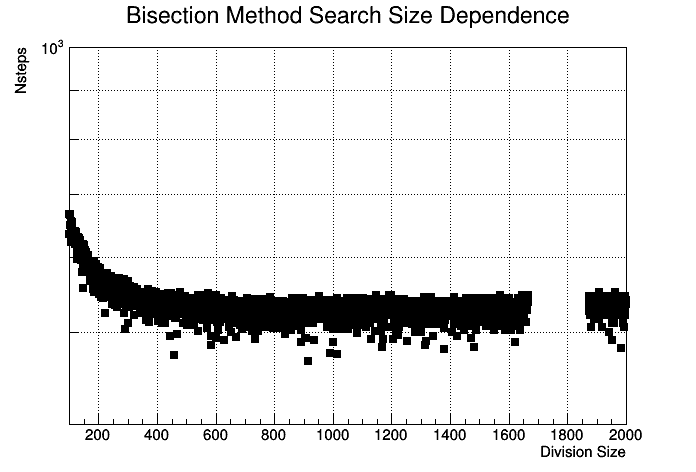

In [5]:
gr = TGraph(npoints,xstep,ystep)

gr.SetMarkerStyle(21)
gr.SetMaximum(1000.0)
gr.SetMinimum(400.0)
gr.GetXaxis().SetLimits(100,2000.0)
gr.SetTitle("Bisection Method Search Size Dependence")
gr.GetXaxis().SetTitle("Division Size")
gr.GetYaxis().SetTitle("Nsteps")
gr.Draw("AP")

c1.Draw()
